# Housing Price Prediction Using Machine Learning (Guided)

In [ ]:
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Importing Dataset and look into Data

In [2]:
data = pd.read_csv('./Datasets/Housing Price.csv')

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [4]:
data.shape

(5000, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
## Data Preprocessing

In [ ]:
## Missing Values

In [7]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [ ]:
## Duplicated

In [8]:
data.duplicated().sum()

0

In [ ]:
## Outliers

In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3-Q1

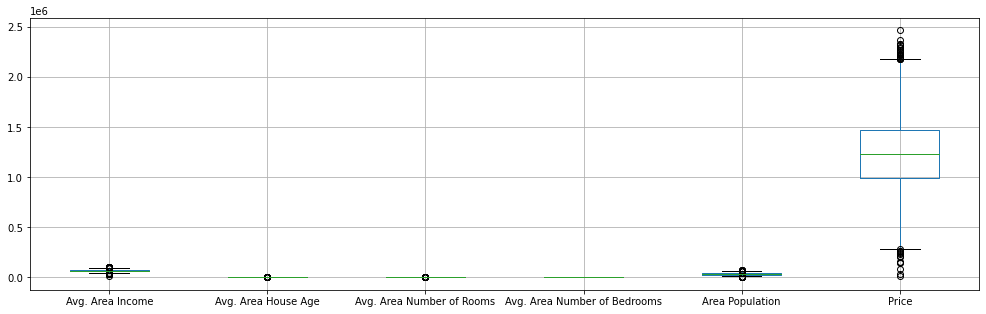

In [38]:
plt.figure(figsize=(17,5))
data.boxplot()
plt.show()

In [42]:
out_rows =((data< Q1-1.5*IQR) |( data> (Q3+1.5*IQR))).any(axis=1)

In [44]:
data = data[~out_rows]

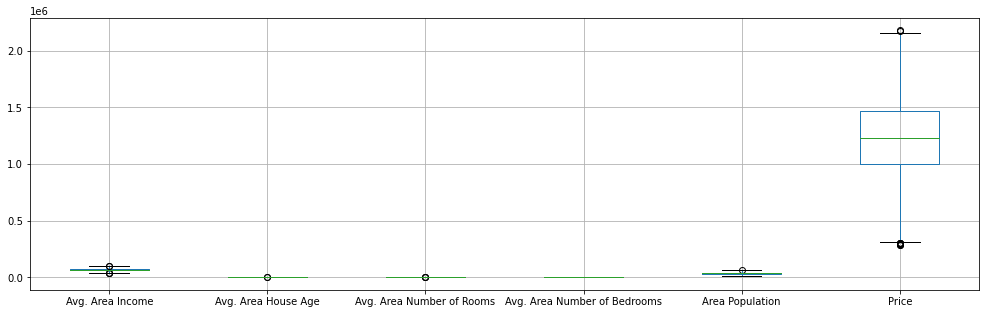

In [45]:
plt.figure(figsize=(17,5))
data.boxplot()
plt.show()

In [47]:
data.shape

(4865, 6)

In [48]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

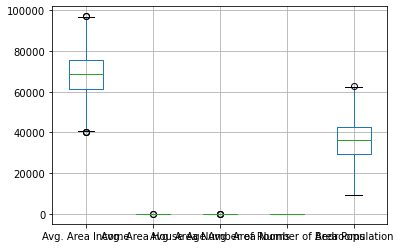

In [51]:
data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']].boxplot()

plt.show()

In [ ]:
## Exploratory Analysis

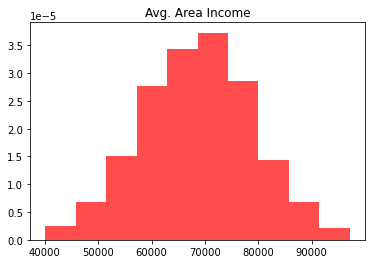

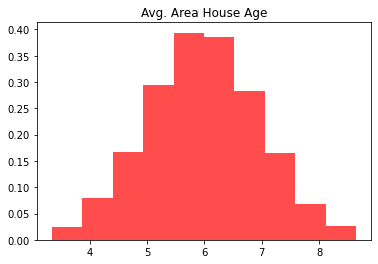

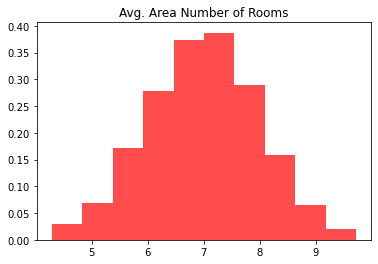

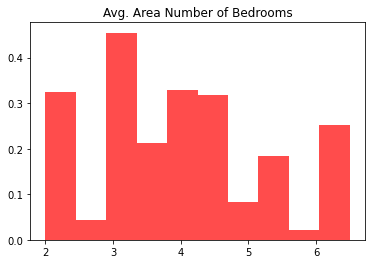

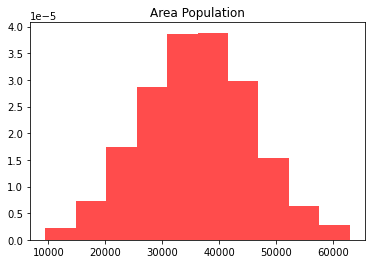

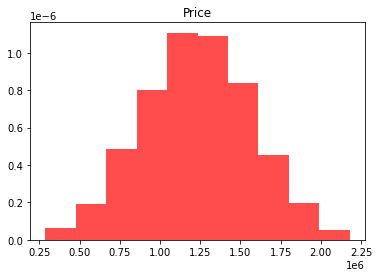

In [53]:
for variable in data.columns:
    plt.hist(data[variable],color ='r', alpha =0.7 , density=True)
    plt.title(variable)
    
    plt.show()





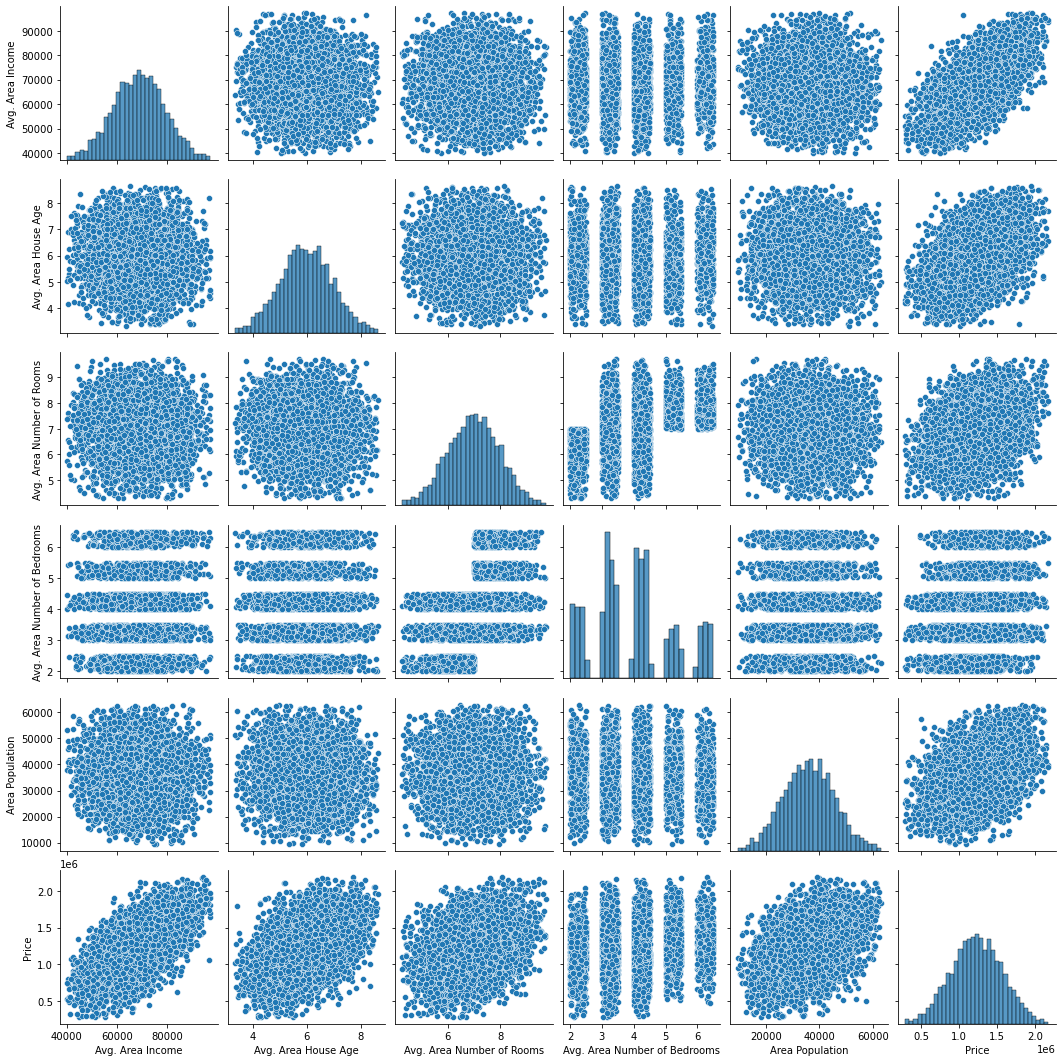

In [54]:
sns.pairplot(data)

plt.show()

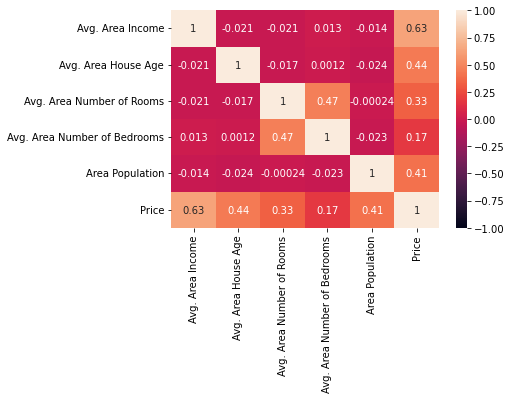

In [61]:
sns.heatmap(data.corr(),annot= True , vmin = -1 ,vmax= 1)

plt.show()

## Machine Learning

In [62]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [70]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [66]:
## Train set 

In [72]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y , test_size=0.2 ,random_state=0)

In [ ]:
## Standerdizer

In [73]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()


x_train = sc_x.fit_transform(x_train)
x_test  = sc_x.transform(x_test)

In [ ]:
## Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [75]:
lm.coef_

array([220970.25927421, 160903.81568055, 118267.6315565 ,   2207.95671532,
       146032.22993058])

In [82]:
data.columns[0:5]

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [89]:
a

array(['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population'], dtype='<U28')

In [88]:
a = np.array(a)

In [83]:
a =['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']

In [77]:
lm.intercept_

1232723.2410657033

In [78]:
lm.score(x_train,y_train)

0.9125080079620776

In [91]:
np.concatenate((a.reshape(-1,1) , lm.coef_.reshape(-1,1)),1)

array([['Avg. Area Income', '220970.2592742127'],
       ['Avg. Area House Age', '160903.81568055286'],
       ['Avg. Area Number of Rooms', '118267.63155650058'],
       ['Avg. Area Number of Bedrooms', '2207.956715322307'],
       ['Area Population', '146032.2299305769']], dtype='<U32')

In [97]:
pd.DataFrame(np.concatenate((a.reshape(-1,1) , lm.coef_.reshape(-1,1)),1) ,columns=[['Variable','Co-effcient']])

,Variable,Co-effcient
0,Avg. Area Income,220970.2592742127
1,Avg. Area House Age,160903.81568055286
2,Avg. Area Number of Rooms,118267.63155650058
3,Avg. Area Number of Bedrooms,2207.956715322307
4,Area Population,146032.2299305769


In [98]:
y_pred = lm.predict(x_test)

In [106]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [107]:
r2_score(y_test,y_pred)

0.9087911851300086

In [110]:
mean_squared_error(y_pred,y_test)

10450215630.196606

In [108]:
resid = y_train - lm.predict(x_train)

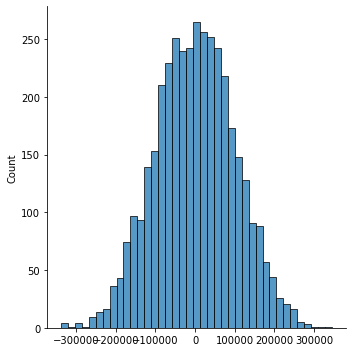

In [109]:
sns.displot(resid)

plt.show()

In [ ]:
## Random Forest Regression 

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
from sklearn.model_selection import KFold,GridSearchCV

In [119]:
param ={'n_estimators':[100,200,300,400,500]}

model = RandomForestRegressor()

cval = KFold(n_splits = 5)


In [120]:
gsearch = GridSearchCV(model,param,cv =cval)

In [121]:
results =gsearch.fit(x_train,y_train)

In [122]:
results.best_params_

{'n_estimators': 300}

In [123]:
rf = RandomForestRegressor(n_estimators=300 , random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [124]:
y_pred =rf.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

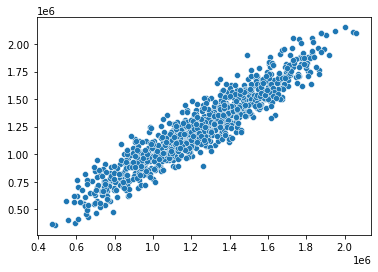

In [125]:
sns.scatterplot(y_pred,y_test)

In [126]:
r2_score(y_pred,y_test)

0.8507058555979374